In [1]:
import sys
sys.path.append("..")

In [2]:
from datasets import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#SAT_df=get_SATScores()
#SAT_df=pd.read_csv('https://data.cityofnewyork.us/resource/rt5r-ie69.csv')
#SAT_df.head()

In [3]:
def get_SAT_by_District():
    SAT_df=get_SATScores('2010')
    SAT_df = SAT_df.dropna()
    SAT_df.critical_reading_mean = SAT_df.critical_reading_mean.astype('int')
    SAT_df.mathematics_mean= SAT_df.mathematics_mean.astype('int')
    SAT_df.writing_mean = SAT_df.writing_mean.astype('int')
    SAT_df.number_of_test_takers=SAT_df.number_of_test_takers.astype('int')
    
    SAT_df['combined_score'] = SAT_df['critical_reading_mean']+SAT_df['mathematics_mean']+SAT_df['writing_mean']


    SAT_df = SAT_df[['dbn','school_name','combined_score','number_of_test_takers']]
    
    SAT_df['district']=SAT_df.dbn.str[:2]
    
    SAT_df = SAT_df[['district','school_name','combined_score','number_of_test_takers']]

    SAT_DF=pd.DataFrame()
    
    SAT_DF['Total_Takers']=SAT_df.groupby('district')['number_of_test_takers'].sum()
    
    SAT_DF['Combined_SAT_scores']=SAT_df.groupby('district')['combined_score'].mean()
    
    SAT_DF['District']=SAT_DF.index
    SAT_DF.District=SAT_DF.District.astype('int')

    SAT_DF.reset_index(drop=True, inplace=True)
    
    SAT_DF = SAT_DF[['District','Total_Takers','Combined_SAT_scores']]
    
    return SAT_DF





In [4]:
def get_SAT_by_District_2012():
    SAT_df=get_SATScores('2012')
    SAT_df = SAT_df[SAT_df.sat_critical_reading_avg_score != 's']
    SAT_df.sat_critical_reading_avg_score = SAT_df.sat_critical_reading_avg_score.astype('int')
    SAT_df.sat_math_avg_score= SAT_df.sat_math_avg_score.astype('int')
    SAT_df.sat_writing_avg_score= SAT_df.sat_writing_avg_score.astype('int')
    SAT_df.num_of_sat_test_takers=SAT_df.num_of_sat_test_takers.astype('int')
    
    SAT_df['combined_score'] = SAT_df['sat_critical_reading_avg_score']+SAT_df['sat_math_avg_score']+SAT_df['sat_writing_avg_score']


    SAT_df = SAT_df[['dbn','school_name','combined_score','num_of_sat_test_takers']]
    
    SAT_df['district']=SAT_df.dbn.str[:2]
    
    SAT_df = SAT_df[['district','school_name','combined_score','num_of_sat_test_takers']]

    SAT_DF=pd.DataFrame()
    
    SAT_DF['Total_Takers']=SAT_df.groupby('district')['num_of_sat_test_takers'].sum()
    
    SAT_DF['Combined_SAT_scores']=SAT_df.groupby('district')['combined_score'].mean()
    
    SAT_DF['District']=SAT_DF.index
    SAT_DF.District=SAT_DF.District.astype('int')

    SAT_DF.reset_index(drop=True, inplace=True)
    
    SAT_DF = SAT_DF[['District','Total_Takers','Combined_SAT_scores']]
    
    return SAT_DF





In [5]:
def get_SAT_by_District_2015():
    #SAT_df=get_SATScores('2012')
    SAT_df=pd.read_csv('https://drive.google.com/uc?export=download&id=1v9R8nSZ5wnzFMt7i2AFk0qPw7tuPmXwZ')
    SAT_df = SAT_df[['School ID','School Name','Average Score (SAT Math)','Average Score (SAT Reading)','Average Score (SAT Writing)']]
    SAT_df.columns=['dbn','school_name','sat_math_avg_score','sat_critical_reading_avg_score','sat_writing_avg_score']
    #SAT_df = SAT_df[SAT_df.sat_critical_reading_avg_score != 's']
    SAT_df=SAT_df.dropna()
    SAT_df.sat_critical_reading_avg_score = SAT_df.sat_critical_reading_avg_score.astype('int')
    SAT_df.sat_math_avg_score= SAT_df.sat_math_avg_score.astype('int')
    SAT_df.sat_writing_avg_score= SAT_df.sat_writing_avg_score.astype('int')
    #SAT_df.num_of_sat_test_takers=SAT_df.num_of_sat_test_takers.astype('int')
    
    SAT_df['combined_score'] = SAT_df['sat_critical_reading_avg_score']+SAT_df['sat_math_avg_score']+SAT_df['sat_writing_avg_score']


    SAT_df = SAT_df[['dbn','school_name','combined_score']]
    
    SAT_df['district']=SAT_df.dbn.str[:2]
    
    SAT_df = SAT_df[['district','school_name','combined_score']]

    SAT_DF = pd.DataFrame()
    
    
    SAT_DF['Combined_SAT_scores']=SAT_df.groupby('district')['combined_score'].mean()
    
    SAT_DF['District']=SAT_DF.index
    SAT_DF.District=SAT_DF.District.astype('int')

    SAT_DF.reset_index(drop=True, inplace=True)
    
    SAT_DF = SAT_DF[['District','Combined_SAT_scores']]
    
    return SAT_DF





In [50]:
SAT_df_2010=get_SAT_by_District()
SAT_df_2010 = SAT_df_2010[SAT_df_2010.District < 75]


In [54]:
SAT_df_2012=get_SAT_by_District_2012()
SAT_df_2012 = SAT_df_2012[SAT_df_2012.District < 75]

In [8]:
SAT_df_2015=get_SAT_by_District_2015()

In [57]:
SAT_df_2010.head()

,District,Total_Takers,Combined_SAT_scores
0,1,560,1343.125000
1,2,5479,1282.035088
2,3,1393,1281.545455
3,4,589,1192.250000
4,5,560,1282.250000


In [58]:
SAT_df_2012.head()

,District,Total_Takers,Combined_SAT_scores
0,1,660,1305.777778
1,2,6175,1284.862069
2,3,1414,1267.923077
3,4,696,1191.142857
4,5,634,1218.222222


In [59]:
SAT_df_2015.head()

,District,Combined_SAT_scores
0,1,1447.666667
1,2,1346.163265
2,3,1350.083333
3,4,1312.000000
4,5,1382.571429


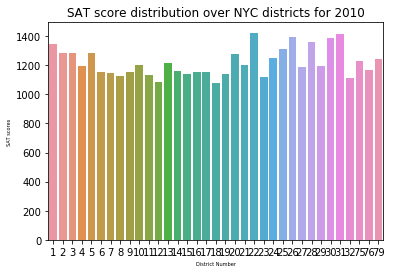

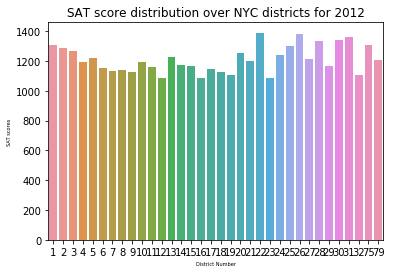

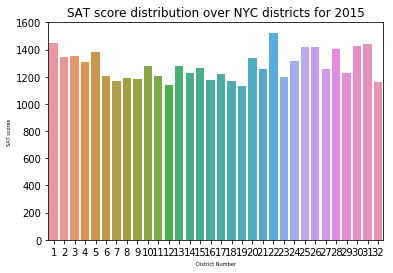

In [28]:

sns.barplot(x=SAT_df_2010.District, y=SAT_df_2010.Combined_SAT_scores)

plt.xlabel('District Number', fontsize=5)
plt.ylabel('SAT scores', fontsize=5)
plt.title('SAT score distribution over NYC districts for 2010')
plt.show()

sns.barplot(x=SAT_df_2012.District, y=SAT_df_2012.Combined_SAT_scores)

plt.xlabel('District Number', fontsize=5)
plt.ylabel('SAT scores', fontsize=5)
plt.title('SAT score distribution over NYC districts for 2012')
plt.show()

sns.barplot(x=SAT_df_2015.District, y=SAT_df_2015.Combined_SAT_scores)

plt.xlabel('District Number', fontsize=5)
plt.ylabel('SAT scores', fontsize=5)
plt.title('SAT score distribution over NYC districts for 2015')
plt.show()

In [80]:
SAT_df_2010 = SAT_df_2010.sort_values(['Combined_SAT_scores'],ascending=False)
SAT_df_2012 = SAT_df_2012.sort_values(['Combined_SAT_scores'],ascending=False)
SAT_df_2015 = SAT_df_2015.sort_values(['Combined_SAT_scores'],ascending=False)


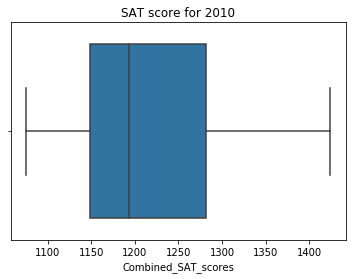

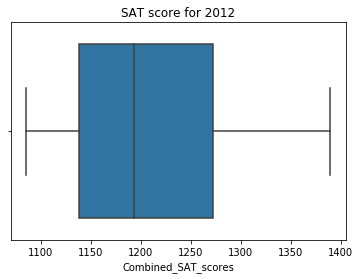

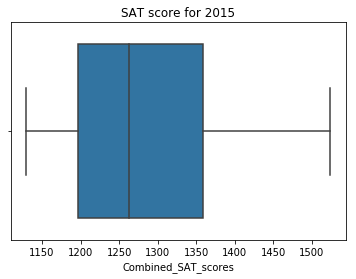

In [92]:
sns.boxplot(x=SAT_df_2010["Combined_SAT_scores"])
plt.title('SAT score for 2010')
plt.show() 

sns.boxplot(x=SAT_df_2012["Combined_SAT_scores"])
plt.title('SAT score for 2012')
plt.show() 

sns.boxplot(x=SAT_df_2015["Combined_SAT_scores"])
plt.title('SAT score for 2015')
plt.show() 


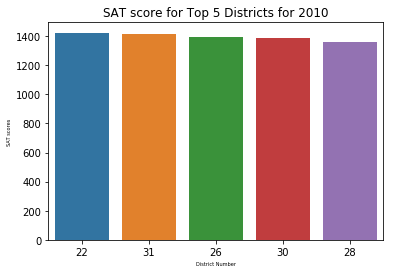

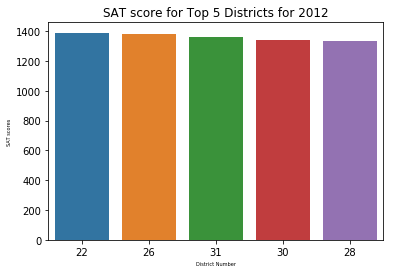

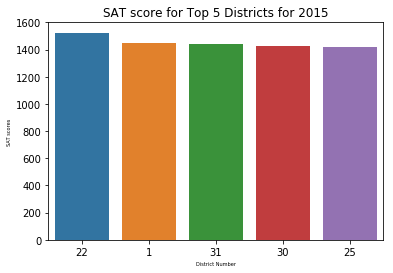

In [93]:

sns.barplot(x=SAT_df_2010.District[:5], y=SAT_df_2010.Combined_SAT_scores[:5],order=SAT_df_2010.District[:5])

plt.xlabel('District Number', fontsize=5)
plt.ylabel('SAT scores', fontsize=5)
plt.title('SAT score for Top 5 Districts for 2010')
plt.show()

sns.barplot(x=SAT_df_2012.District[:5], y=SAT_df_2012.Combined_SAT_scores[:5],order=SAT_df_2012.District[:5])

plt.xlabel('District Number', fontsize=5)
plt.ylabel('SAT scores', fontsize=5)
plt.title('SAT score for Top 5 Districts for 2012')
plt.show()

sns.barplot(x=SAT_df_2015.District[:5], y=SAT_df_2015.Combined_SAT_scores[:5],order=SAT_df_2015.District[:5])

plt.xlabel('District Number', fontsize=5)
plt.ylabel('SAT scores', fontsize=5)
plt.title('SAT score for Top 5 Districts for 2015')
plt.show()

In [15]:
print(SAT_df_2010.loc[SAT_df_2010['Combined_SAT_scores'].idxmax()])

District                 22.0
Total_Takers           1906.0
Combined_SAT_scores    1424.0
Name: 21, dtype: float64


In [16]:
print(SAT_df_2012.loc[SAT_df_2012['Combined_SAT_scores'].idxmax()])

District                 22.0
Total_Takers           1968.0
Combined_SAT_scores    1389.4
Name: 21, dtype: float64


In [17]:
print(SAT_df_2015.loc[SAT_df_2015['Combined_SAT_scores'].idxmax()])

District                 22.0
Combined_SAT_scores    1524.0
Name: 21, dtype: float64


In [18]:
print(SAT_df_2010.loc[SAT_df_2010['Combined_SAT_scores'].idxmin()])

District                 18.0
Total_Takers            243.0
Combined_SAT_scores    1075.2
Name: 17, dtype: float64


In [19]:
print(SAT_df_2012.loc[SAT_df_2012['Combined_SAT_scores'].idxmin()])

District                 23.000000
Total_Takers            219.000000
Combined_SAT_scores    1085.166667
Name: 22, dtype: float64


In [20]:
print(SAT_df_2015.loc[SAT_df_2015['Combined_SAT_scores'].idxmin()])

District                 19.000000
Combined_SAT_scores    1129.076923
Name: 18, dtype: float64
